In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import svd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data.csv")
df

,x,y,z
0,0.550000,-0.160606,0.106061
1,0.551515,-0.154545,0.106061
2,0.553030,-0.159091,0.104545
3,0.553030,-0.157576,0.103030
4,0.553030,-0.159091,0.103030
...,...,...,...
4251,0.343939,-0.296970,-0.298485
4252,0.346970,-0.295455,-0.298485
4253,0.348485,-0.293939,-0.301515
4254,0.351515,-0.293939,-0.301515


In [3]:
datas = df.to_numpy()
datas

array([[ 0.55    , -0.160606,  0.106061],
       [ 0.551515, -0.154545,  0.106061],
       [ 0.55303 , -0.159091,  0.104545],
       ...,
       [ 0.348485, -0.293939, -0.301515],
       [ 0.351515, -0.293939, -0.301515],
       [ 0.35303 , -0.293939, -0.301515]])

In [6]:
def fit_ellipsoid(datas):
    # 構造矩陣 M
    X, Y, Z = datas[:, 0], datas[:, 1], datas[:, 2]
    M = np.column_stack((X**2, Y**2, Z**2, X, Y, Z, np.ones_like(X)))
    
    # 奇異值分解 (SVD)
    U, S, Vt = svd(M)
    
    # 橢球參數向量 theta（最小奇異值對應的右奇異向量）
    theta = Vt[-1, :]  # Vt 的最後一行對應最小奇異值
    return theta

# 擬合橢球
params = fit_ellipsoid(datas)
params

array([-0.45049297, -0.68059278, -0.52212753,  0.13236055,  0.15140742,
       -0.08869986,  0.11367153])

In [152]:
def calibration(data, params):
    x, y, z = data[0], data[1], data[2]
    x0 = params[3]/(-2*params[0])
    y0 = params[4]/(-2*params[1])
    z0 = params[5]/(-2*params[2])
    a = (params[1]*params[2]/params[0])**(0.25)
    b = (params[0]*params[2]/params[1])**(0.25)
    c = (params[0]*params[1]/params[2])**(0.25)
    # x = (x-x0)
    # y = (y-y0)
    # z = (z-z0)
    # x = (x-x0)/np.sqrt(params[0])
    # y = (y-y0)/np.sqrt(params[1])
    # z = (z-z0)/np.sqrt(params[2])
    x = (x-x0)/(a**0.5)
    y = (y-y0)/(b**0.5)
    z = (z-z0)/(c**0.5)
    # print(x0, y0, z0, a, b, c)
    return [x, y, z]

In [153]:
def batch_calibration(datas, params):
    result = []
    for data in datas:
        result.append(calibration(data, params))
    return result

In [154]:
# calibration(datas[0], params)
calibrated_datas = np.array(batch_calibration(datas, params))
calibrated_datas

array([[ 0.03577217, -0.31755505, -0.43078912],
       [ 0.03577217, -0.31930868, -0.43243488],
       [ 0.03740424, -0.31930868, -0.43078912],
       ...,
       [-0.20726922, -0.2965091 , -0.35178427],
       [-0.20726922, -0.29826274, -0.35178427],
       [-0.20726922, -0.2965091 , -0.35178427]])

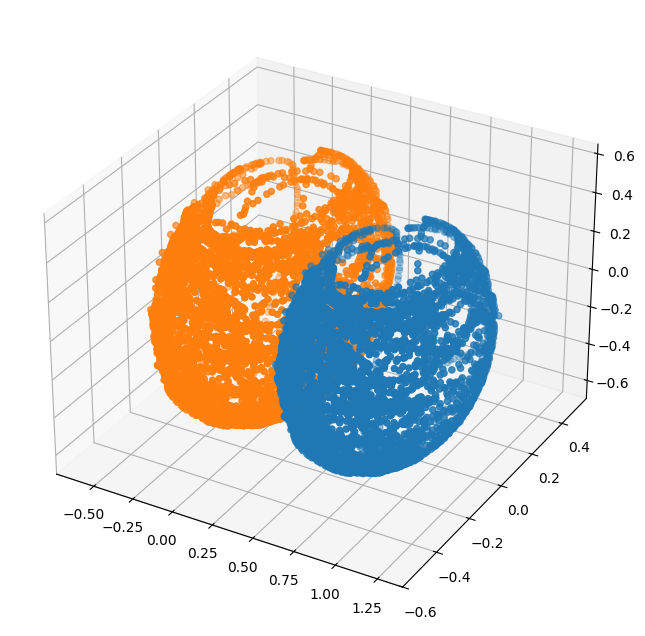

In [155]:
# plt.scatter(datas[:, 0], datas[:, 1])
# plt.scatter(calibrated_datas[:, 0], calibrated_datas[:, 1])
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(projection='3d')   # 設定為 3D 圖表
ax.scatter(datas[:,0],datas[:,1],datas[:,2])
ax.scatter(calibrated_datas[:,0],calibrated_datas[:,1],calibrated_datas[:,2])
plt.show()

In [121]:
import csv
with open("./calibrated_datas.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    # 寫入標題
    writer.writerow(["x", "y", "z"])
    # 寫入數據
    writer.writerows(calibrated_datas)

In [7]:
def fit_ellipsoid(datas):
    # 構造矩陣 M
    X, Y, Z = datas[:, 0], datas[:, 1], datas[:, 2]
    M = np.column_stack((X**2, Y**2, Z**2, 2*X*Y, 2*Y*Z, 2*X*Z, 2*X, 2*Y, 2*Z, np.ones_like(X)))
    
    # 奇異值分解 (SVD)
    U, S, Vt = svd(M)
    
    # 橢球參數向量 theta（最小奇異值對應的右奇異向量）
    theta = Vt[-1, :]  # Vt 的最後一行對應最小奇異值
    return theta

# 擬合橢球
params = fit_ellipsoid(datas)
params

array([-0.48472767, -0.67654575, -0.51990673, -0.08429429,  0.01600101,
       -0.00878712,  0.07517843,  0.09724137, -0.04271909,  0.11247465])

In [ ]:
def calibration(data, params):
    x, y, z = data[0], data[1], data[2]
    x0 = params[3]/(-params[0])
    y0 = params[4]/(-params[1])
    z0 = params[5]/(-params[2])
    # a = (params[1]*params[2]/params[0])**(0.25)
    # b = (params[0]*params[2]/params[1])**(0.25)
    # c = (params[0]*params[1]/params[2])**(0.25)
    # x = (x-x0)
    # y = (y-y0)
    # z = (z-z0)
    x = (x-x0)/np.sqrt(params[0])
    y = (y-y0)/np.sqrt(params[1])
    z = (z-z0)/np.sqrt(params[2])
    # print(x0, y0, z0, a, b, c)
    return [x, y, z]